In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sb

In [3]:
#import clean CSV file for life expectancy
life_expectancy_path = "data_exports/CLEAN_LifeExpectancy_20Countries.csv"
life_expectancy_data = pd.read_csv(life_expectancy_path)
life_expectancy_df = pd.DataFrame(life_expectancy_data)
print(life_expectancy_df.tail())

#import clean CSV file for healthcare spending
healthcare_spending_path = "data_exports/CLEAN_healthcare_spending_20Countries.csv"
#healthcare_spending_path = "data_exports/CLEAN_healthcare_spending_govt_compulsory_20Countries.csv"
healthcare_spending_data = pd.read_csv(healthcare_spending_path)
healthcare_spending_df = pd.DataFrame(healthcare_spending_data)
print(healthcare_spending_df.tail())


#import clean CSV file for healthcare spending
gdp_path = "data_exports/CLEAN_gdp_20Countries.csv"
gdp_data = pd.read_csv(gdp_path)
gdp_df = pd.DataFrame(gdp_data)
print(gdp_df.tail())

gdp_divisor = 300


             entity code  year  life_expectancy
1115  United States  USA  2011        78.681999
1116  United States  USA  2012        78.820999
1117  United States  USA  2013        78.959999
1118  United States  USA  2014        79.099998
1119  United States  USA  2015        79.244003
    code  year     spend
646  RUS  2012  1271.693
647  RUS  2013  1330.579
648  RUS  2014  1355.052
649  RUS  2015  1305.409
650  RUS  2016  1304.732
          gdp  year  entity
715  32568.43  2011  Israel
716  32590.91  2012  Israel
717  33322.50  2013  Israel
718  33876.08  2014  Israel
719  34349.40  2015  Israel


In [4]:
#merge two datasets together
merge_table1 = pd.merge(life_expectancy_df, healthcare_spending_df, on=["code","year"], how="left")
merge_table = pd.merge(merge_table1, gdp_df, on=["entity","year"], how="left")
#merge_table.head()

# Save path to store output file set in a variable
#csv_output = "data_exports/CLEAN_healthcare_spending_20Countries.csv"
csv_output = "data_exports/CLEAN_life_expectancy_and_healthcare_spend_20Countries.csv"

# Export file as a CSV, without the Pandas index, 
# but with the header
merge_table.to_csv(csv_output, index=False, header=True)


# Single country plot

<IPython.core.display.Javascript object>


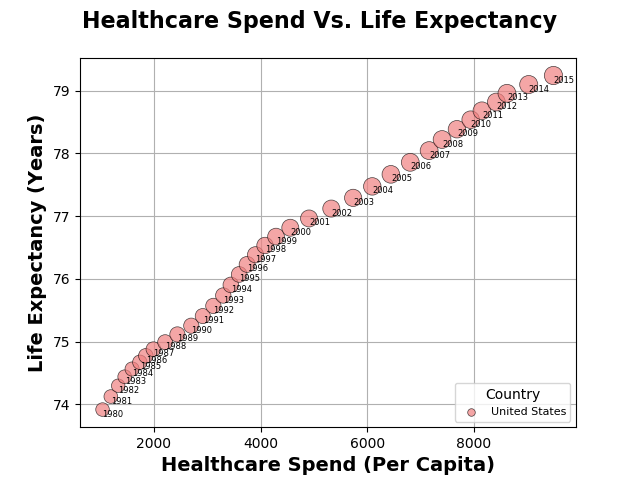

In [7]:
# set up variables for the plot

country_name = "United States"

# count the number of rows by grabbing the "city" column and counting how many of each there are
x_spend = merge_table.loc[merge_table["entity"] == country_name, "spend"].reset_index(drop=True)

# get the average fare for each "city" by averaging the "fare" for each city
y_life_expectancy = merge_table.loc[merge_table["entity"] == country_name, "life_expectancy"].reset_index(drop=True)

# get the count of drivers "city" by averaging the "driver_count" for each city
# since it's the same number for each city, the average will just be the count
size_per_capita_gdp = merge_table.loc[merge_table["entity"] == country_name, "gdp"].reset_index(drop=True)

#color_country = 
year = merge_table.loc[merge_table["entity"] == country_name, "year"].reset_index(drop=True)



fig, ax = plt.subplots()

ax.scatter(x_spend, 
           y_life_expectancy, 
           s=size_per_capita_gdp/gdp_divisor,
           c="lightcoral", 
           #c="#f08080", 
           alpha=0.7, 
           edgecolor="black", 
            linewidth=0.5,
           label=country_name,
           zorder=3)


for i, txt in enumerate(year):
    ax.annotate(txt, 
                (x_spend[i], y_life_expectancy[i]), 
                horizontalalignment='left',
                verticalalignment='top',
                fontsize=6)


# Incorporate the other graph properties
fig.suptitle("Healthcare Spend Vs. Life Expectancy", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 40)
# ax.set_ylim(18, 45)

ax.set_xlabel("Healthcare Spend (Per Capita)", fontsize=14, fontweight="bold")
ax.set_ylabel("Life Expectancy (Years)", fontsize=14, fontweight="bold")

ax.grid(zorder=1)

# Create a legend
lgnd = ax.legend(loc='lower right', title="Country", fontsize=8)   #, fancybox=True)

lgnd.get_title().set_fontsize('10')

lgnd.legendHandles[0]._sizes = [30]

# show the plot
plt.show()

# single year plot with all countries

<IPython.core.display.Javascript object>


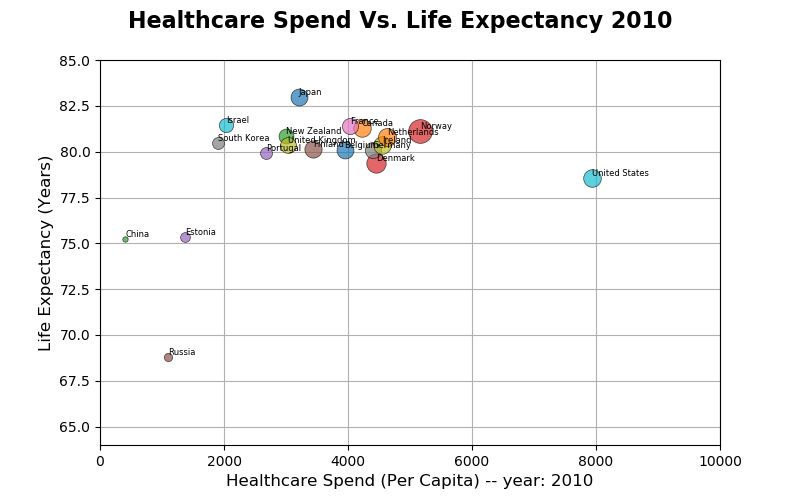

In [9]:
# Plot all the countries in a single year
single_year = 2010

fig2, ax2 = plt.subplots(figsize=(8, 5))



for country in merge_table["entity"].unique():
    # count the number of rows by grabbing the "city" column and counting how many of each there are
    x_spend = merge_table.loc[(merge_table["entity"] == country)
                              & (merge_table["year"] == single_year), "spend"].reset_index(drop=True)

    # get the average fare for each "city" by averaging the "fare" for each city
    y_life_expectancy = merge_table.loc[(merge_table["entity"] == country)
                                        & (merge_table["year"] == single_year), "life_expectancy"].reset_index(drop=True)    

    # get the average fare for each "city" by averaging the "fare" for each city
    size_per_capita_gdp = merge_table.loc[(merge_table["entity"] == country)
                                        & (merge_table["year"] == single_year), "gdp"].reset_index(drop=True)    

    
    ax2.scatter(x_spend, 
           y_life_expectancy, 
           s=size_per_capita_gdp/gdp_divisor,
           #c="lightcoral", 
           #c="#f08080", 
           alpha=0.7, 
           edgecolor="black", 
            linewidth=0.5,
           label=country,
           zorder=3)
    
    ax2.annotate(country, 
                (x_spend[0], y_life_expectancy[0]), 
                horizontalalignment='left',
                verticalalignment='bottom',
                fontsize=6)


# Incorporate the other graph properties
fig2.suptitle("Healthcare Spend Vs. Life Expectancy " + str(single_year), fontsize=16, fontweight="bold")

ax2.set_xlim(0, 10000)
ax2.set_ylim(64, 85)

ax2.set_xlabel("Healthcare Spend (Per Capita) -- year: " + str(single_year), fontsize=12)
ax2.set_ylabel("Life Expectancy (Years)", fontsize=12)

ax2.grid(zorder=1)

# show the plot
plt.show()

#fig2.savefig("images/HealthcareSpend_VS_LifeExpectancy_" + str(single_year) + ".png")

# Save Scatter Plots from year 1980 to 2015

In [ ]:
# Plot all the plots
start_year = 1980
end_year = 2016


for i in range(start_year,end_year):
    fig3, ax3 = plt.subplots(figsize=(8, 5))
    
    for country in merge_table["entity"].unique():
        # count the number of rows by grabbing the "city" column and counting how many of each there are
        x_spend = merge_table.loc[(merge_table["entity"] == country)
                                  & (merge_table["year"] == start_year), "spend"].reset_index(drop=True)

        # get the average fare for each "city" by averaging the "fare" for each city
        y_life_expectancy = merge_table.loc[(merge_table["entity"] == country)
                                            & (merge_table["year"] == start_year), "life_expectancy"].reset_index(drop=True)    

        #size_per_capita_gdp = 100
        # get the average fare for each "city" by averaging the "fare" for each city
        size_per_capita_gdp = merge_table.loc[(merge_table["entity"] == country)
                                            & (merge_table["year"] == start_year), "gdp"].reset_index(drop=True)        


        ax3.scatter(x_spend, 
               y_life_expectancy, 
               s=size_per_capita_gdp/gdp_divisor,
               #c="lightcoral", 
               #c="#f08080", 
               alpha=0.7, 
               edgecolor="black",
                linewidth=0.5,
               label=country,
               zorder=3)
        
        ax3.annotate(country, 
                    (x_spend[0], y_life_expectancy[0]), 
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    fontsize=6)


    # Incorporate the other graph properties
    #fig3.suptitle("Healthcare Spend (Govt Compulsory) Vs. Life Expectancy " + str(start_year), fontsize=16, fontweight="bold")

    ax3.set_xlim(0, 10000)
    ax3.set_ylim(64, 85)

    ax3.set_xlabel("Healthcare Spend (Per Capita) -- year: " + str(start_year), fontsize=12)
    ax3.set_ylabel("Life Expectancy", fontsize=12)

    ax3.grid(zorder=1)


    # show the plot
    plt.show()

    fig3.savefig("images/health_total_vs_life/HealthcareSpend_VS_LifeExpectancy_" + str(start_year) + ".png",
    #fig3.savefig("images/health_govt_comp_vs_life/HealthcareSpend_govt_compulsory_VS_LifeExpectancy_" + str(start_year) + ".png", 
                 dpi=200, 
                 #transparent=True, 
                 quality=95)

    start_year += 1
    
    



# Re-create mistake in for-loop to show all movement from year 1980 to 2015

<IPython.core.display.Javascript object>


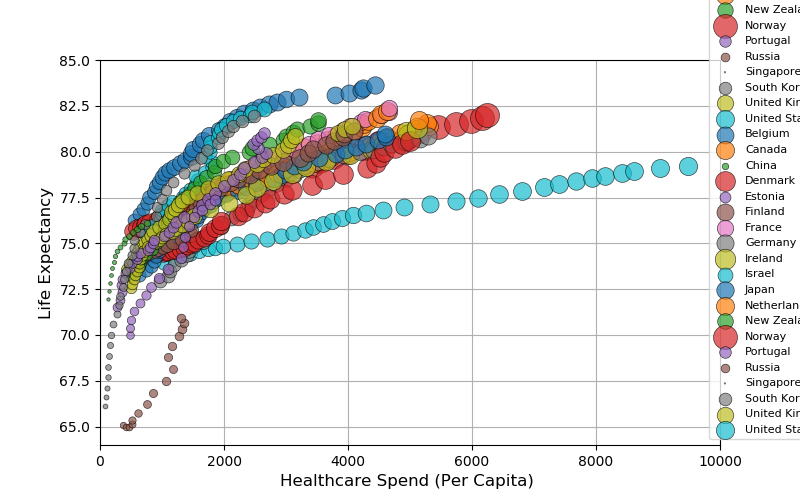

In [10]:
# Plot all the plots
start_year = 1980
end_year = 2016

fig3, ax3 = plt.subplots(figsize=(8, 5))
for i in range(start_year,end_year):
    
    for country in merge_table["entity"].unique():
        # count the number of rows by grabbing the "city" column and counting how many of each there are
        x_spend = merge_table.loc[(merge_table["entity"] == country)
                                  & (merge_table["year"] == start_year), "spend"].reset_index(drop=True)

        # get the average fare for each "city" by averaging the "fare" for each city
        y_life_expectancy = merge_table.loc[(merge_table["entity"] == country)
                                            & (merge_table["year"] == start_year), "life_expectancy"].reset_index(drop=True)    

        #size_per_capita_gdp = 100
        # get the average fare for each "city" by averaging the "fare" for each city
        size_per_capita_gdp = merge_table.loc[(merge_table["entity"] == country)
                                            & (merge_table["year"] == start_year), "gdp"].reset_index(drop=True)        


        ax3.scatter(x_spend, 
               y_life_expectancy, 
               s=size_per_capita_gdp/gdp_divisor,
               #c="lightcoral", 
               #c="#f08080", 
               alpha=0.7, 
               edgecolor="black",
                linewidth=0.5,
               label=country,
               zorder=3)
 

    start_year += 1
    
    
# Create a legend
lgnd = ax3.legend(loc='lower right', 
                  bbox_to_anchor=(0.5, 0.0, 0.7, 0.5), 
                  title="Country", 
                  fontsize=8)   #, fancybox=True)

lgnd.get_title().set_fontsize('10')

lgnd.legendHandles[0]._sizes = [30]    
    

ax3.set_xlim(0, 10000)
ax3.set_ylim(64, 85)

ax3.set_xlabel("Healthcare Spend (Per Capita) ", fontsize=12)
ax3.set_ylabel("Life Expectancy", fontsize=12)

ax3.grid(zorder=1)


# fig3.savefig("images/health_vs_life/HealthcareSpend_VS_LifeExpectancy_" + str(start_year) + ".png",  
# fig3.savefig("images/health_govt_comp_vs_life/HealthcareSpend_govt_compulsory_VS_LifeExpectancy_2016_all_.png", 
#                  dpi=200, 
#                  #transparent=True, 
#                  quality=95)

